# 8 - PlotTesting

In [1]:
%matplotlib notebook

import numpy as np
import awkward as ak
import uproot
import src.functions as fn
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm

In [2]:
filename = "tracksters_ds.root"
file = uproot.open(filename)

In [3]:
tracksters = file["tracksters/complete"]

In [4]:
vertices_indexes = tracksters['vertices_indexes'].array()
vertices_x = tracksters['vertices_x'].array()
vertices_y = tracksters['vertices_y'].array()
vertices_z = tracksters['vertices_z'].array()
vertices_E = tracksters['vertices_energy'].array()

In [5]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt


trackstersInCom = file["tracksters/incomplete"]
verticesInCom_indexes = trackstersInCom['vertices_indexes'].array()
verticesInCom_x = trackstersInCom['vertices_x'].array()
verticesInCom_y = trackstersInCom['vertices_y'].array()
verticesInCom_z = trackstersInCom['vertices_z'].array()
verticesInCom_E = trackstersInCom['vertices_energy'].array()
edgesInCom = fn.edgeBuilderNNTr(verticesInCom_indexes, verticesInCom_x, verticesInCom_y, verticesInCom_z, verticesInCom_E)
    
trackstersCom = file["tracksters/complete"]
verticesCom_indexes = trackstersCom['vertices_indexes'].array()
verticesCom_x = trackstersCom['vertices_x'].array()
verticesCom_y = trackstersCom['vertices_y'].array()
verticesCom_z = trackstersCom['vertices_z'].array()
verticesCom_E = trackstersCom['vertices_energy'].array()
edgesCom = fn.edgeBuilderNNTr(verticesCom_indexes, verticesCom_x, verticesCom_y, verticesCom_z, verticesCom_E)

def plotEnergyCentrality(vertices_indexes,vertices_x,vertices_y,vertices_z,vertices_E,edges,tracksterN):
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,vertices_x[tracksterN], vertices_y[tracksterN], vertices_z[tracksterN],
                     vertices_E[tracksterN],vertices_indexes[tracksterN],edges[tracksterN],'Vertex Energy (GeV)')

    centralities=fn.centralityPageRank(fn.adjM(vertices_indexes[tracksterN],edges[tracksterN]),0.85)
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,vertices_x[tracksterN], vertices_y[tracksterN], vertices_z[tracksterN],
                     centralities,vertices_indexes[tracksterN],edges[tracksterN],'PageRank Centrality')

    centralities=fn.nXCentralityEigen(vertices_indexes[tracksterN],edges[tracksterN])

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,vertices_x[tracksterN], vertices_y[tracksterN], vertices_z[tracksterN],
                     centralities,vertices_indexes[tracksterN],edges[tracksterN],'Eigen Centrality')

In [6]:
plotEnergyCentrality(verticesCom_indexes, verticesCom_x, verticesCom_y, verticesCom_z, verticesCom_E,
                     edgesCom,2)

<IPython.core.display.Javascript object>

TypeError: object of type 'Record' has no len()

In [ ]:
plotEnergyCentrality(verticesCom_indexes, verticesCom_x, verticesCom_y, verticesCom_z, verticesCom_E,
                     edgesCom,3)

In [ ]:
plotEnergyCentrality(verticesCom_indexes, verticesCom_x, verticesCom_y, verticesCom_z, verticesCom_E,
                     edgesCom,30)

In [ ]:
plotEnergyCentrality(verticesCom_indexes, verticesCom_x, verticesCom_y, verticesCom_z, verticesCom_E,edgesCom,10)

In [ ]:
plotEnergyCentrality(verticesInCom_indexes, verticesInCom_x, verticesInCom_y, verticesInCom_z, verticesInCom_E,
                     edgesInCom,20)

In [ ]:
plotEnergyCentrality(verticesInCom_indexes, verticesInCom_x, verticesInCom_y, verticesInCom_z, verticesInCom_E,
                     edgesInCom,3)

In [ ]:
plotEnergyCentrality(verticesInCom_indexes, verticesInCom_x, verticesInCom_y, verticesInCom_z, verticesInCom_E,
                     edgesInCom,11)

In [ ]:
print(tracksters.keys())

In [6]:
tracksterN=2
def longestPathSource(nodes,edges,centralities):
    G=nx.Graph()
    G.add_edges_from(ak.to_numpy(edges))
    G.add_nodes_from(ak.to_numpy(nodes))
    
    i_centralityMax=np.argmax(centralities)
    source=nodes[i_centralityMax]
    
    pathList=nx.shortest_path_length(G,source=source)
    longestShortestPath=max(pathList.values())
    return longestShortestPath

centralities=fn.nXCentralityEigen(verticesCom_indexes[tracksterN],edgesCom[tracksterN])

longestPath=longestPathSource(verticesCom_indexes[tracksterN],edgesCom[tracksterN],centralities)

print(longestPath)

NameError: name 'verticesCom_indexes' is not defined

In [8]:
longestComPaths=[]
for i in range(len(verticesCom_indexes)):
    centralities=fn.centralityEigen(fn.adjM(verticesCom_indexes[i],edgesCom[i]))
    longestPath=fn.longestPathSource(verticesCom_indexes[i],edgesCom[i],centralities)
    longestComPaths.append(longestPath)

longestInComPaths=[]
for i in range(len(verticesInCom_indexes)):
    centralities=fn.centralityEigen(fn.adjM(verticesInCom_indexes[i],edgesInCom[i]))
    longestPath=fn.longestPathSource(verticesInCom_indexes[i],edgesInCom[i],centralities)
    longestInComPaths.append(longestPath)


In [9]:
centralities

array([ 0.17911174,  0.22070391, -0.09581   , -0.41259434,  0.22070391,
        0.32991555, -0.09581   , -0.34738537, -0.2041654 , -0.2041654 ,
        0.47030691,  0.1422422 , -0.32766321,  0.1422422 ])

In [ ]:
%matplotlib inline
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths, bins='auto', color='b', alpha=0.7,label='Complete')
plt.hist(longestInComPaths, bins='auto', color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network",)
plt.show()

In [ ]:
filename2 = "/afs/cern.ch/user/d/dmagdali/CernCentralityProject/tracksters_ds_10e.root"
file2 = uproot.open(filename2)
tracksters10e=file2['tracksters']

In [ ]:
print(tracksters10e.keys())
tracksters10eLabels=tracksters10e['trackster_label'].array()

In [ ]:
longestComPaths=[]
longestInComPaths=[]
vertices10e_indexes=tracksters10e['vertices_indexes'].array()
vertices10e_x = tracksters10e['vertices_x'].array()
vertices10e_y = tracksters10e['vertices_y'].array()
vertices10e_z = tracksters10e['vertices_z'].array()
vertices10e_E = tracksters10e['vertices_energy'].array()
edges10e = fn.edgeBuilderNNTr(vertices10e_indexes, vertices10e_x, vertices10e_y, vertices10e_z, vertices10e_E)

In [ ]:
for i in range(len(vertices10e_indexes)):
    centralities=fn.centralityEigen(fn.adjM(vertices10e_indexes[i],edges10e[i]))
    longestPath=longestPathSource(vertices10e_indexes[i],edges10e[i],centralities)
    if(tracksters10eLabels[i]==1):
        longestComPaths.append(longestPath)
    else:
        longestInComPaths.append(longestPath)



In [ ]:
%matplotlib inline
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths, bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(longestInComPaths, bins=10, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.title("10e dataset Eigen centrality")
plt.show()

In [3]:
filename200e = "/afs/cern.ch/user/d/dmagdali/CernCentralityProject/tracksters_ds_200e.root"
file200e = uproot.open(filename200e)
tracksters200e=file200e['tracksters']

In [4]:
tracksters200eLabels=tracksters200e['trackster_label'].array()
longestComPaths=[]
longestInComPaths=[]
vertices200e_indexes=tracksters200e['vertices_indexes'].array()
vertices200e_x = tracksters200e['vertices_x'].array()
vertices200e_y = tracksters200e['vertices_y'].array()
vertices200e_z = tracksters200e['vertices_z'].array()
vertices200e_E = tracksters200e['vertices_energy'].array()
edges200e = fn.edgeBuilderNNTr(vertices200e_indexes, vertices200e_x, vertices200e_y, vertices200e_z, vertices200e_E)

In [7]:
for i in range(len(vertices200e_indexes)):
    centralities=fn.centralityEigen(fn.adjM(vertices200e_indexes[i],edges200e[i]))
    longestPath=longestPathSource(vertices200e_indexes[i],edges200e[i],centralities)
    if(tracksters200eLabels[i]==1):
        longestComPaths.append(longestPath)
    else:
        longestInComPaths.append(longestPath)

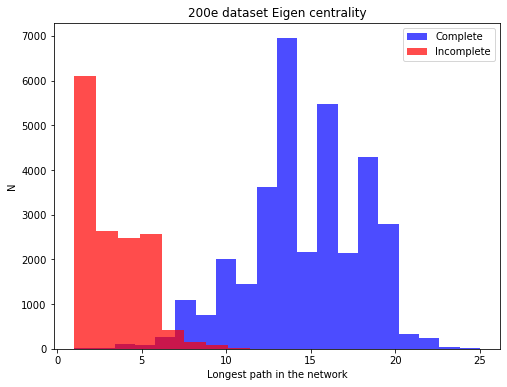

In [8]:
%matplotlib inline
plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(longestComPaths, bins=20, color='b', alpha=0.7,label='Complete')
plt.hist(longestInComPaths, bins=10, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N")
plt.xlabel("Longest path in the network")
plt.title("200e dataset Eigen centrality")
plt.show()

In [ ]:
filename2="/eos/user/b/bmaier/ticl_ml_hackathon/samples/landingzone/two_closeby_photons_pu0/ntuples_13801550_238.root"
file2closeby = uproot.open(filename2)

In [ ]:
trackstersClose=file2closeby['ticlNtuplizer/tracksters']

In [ ]:
trackstersClose.keys()

In [ ]:
closeVertices_E=trackstersClose['raw_energy'].array()
closeTrackster_Eta=trackstersClose['trackster_barycenter_eta'].array()
closeTrackster_Phi=trackstersClose['trackster_barycenter_phi'].array()

In [ ]:
print(ak.min(closeVertices_E))

In [ ]:
closeTrackster_R=np.sqrt(closeTrackster_Eta**2+closeTrackster_Phi**2)

closeTrackster_dR=[]
for i in closeTrackster_R:
    if (len(closeTrackster_R[i])==2):
        dR=np.abs(i[0]-i[1])
        closeTrackster_dR.append(dR)
closeTrackster_np_dR=np.asarray(closeTrackster_dR)
print(np.sort(closeTrackster_np_dR))

In [ ]:
length2Bool=np.array(ak.sum(closeTrackster_R != None,axis=1)) ==2

In [ ]:
closeTrackster_dR=np.abs(closeTrackster_R[length2Bool][:,0]-closeTrackster_R[length2Bool][:,1])
dRBoolAverage=closeTrackster_dR> np.mean(closeTrackster_dR)

In [ ]:
underTenEBool=closeVertices_E[length2Bool][dRBoolAverage]<10

In [ ]:
underTenEBool=[np.where(underTenEBool==True)[0][0],np.where(underTenEBool==True)[1][0]]

In [ ]:
verticesClose_indexes = trackstersClose['vertices_indexes'].array()[length2Bool][dRBoolAverage][underTenEBool]
verticesClose_x = trackstersClose['vertices_x'].array()[length2Bool][dRBoolAverage][underTenEBool]
verticesClose_y = trackstersClose['vertices_y'].array()[length2Bool][dRBoolAverage][underTenEBool]
verticesClose_z = trackstersClose['vertices_z'].array()[length2Bool][dRBoolAverage][underTenEBool]
verticesClose_E = trackstersClose['vertices_energy'].array()[length2Bool][dRBoolAverage][underTenEBool]
edgesClose = fn.edgeBuilderNNTr(verticesCom_indexes, verticesCom_x, verticesCom_y, verticesCom_z, verticesCom_E)

In [ ]:

def plotEnergyCentralityOne(vertices_indexes,vertices_x,vertices_y,vertices_z,vertices_E,edges):
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,vertices_x, vertices_y, vertices_z,
                     vertices_E,vertices_indexes,edges,'Vertex Energy (GeV)')

    centralities=fn.centralityPageRank(fn.adjM(vertices_indexes,edges),0.85)
    
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,vertices_x, vertices_y, vertices_z,
                     centralities,vertices_indexes,edges,'PageRank Centrality')

    centralities=fn.nXCentralityEigen(vertices_indexes,edges)

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    fn.plotTrackster(fig,ax,vertices_x, vertices_y, vertices_z,
                     centralities,vertices_indexes,edges,'Eigen Centrality')
print(edgesClose[0])
plotEnergyCentralityOne(verticesClose_indexes[0][0], verticesClose_x[0][0], verticesClose_y[0][0],
                        verticesClose_z[0][0],verticesClose_E[0][0], edgesClose[0])